In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\HP\Downloads\train_ctrUa4K.csv',index_col= 'Loan_ID')

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 12)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.dtypes 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Preprocessing

In [7]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
for num in ['Gender','Married','Married','Self_Employed','Dependents']:
    df[num]= df[num].fillna(df[num].mode()[0])

In [10]:
df['Gender'].mode()[0]

'Male'

In [11]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
for num in ['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    df[num]= df[num].fillna(df[num].median())

In [13]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#checking correlation

<AxesSubplot:>

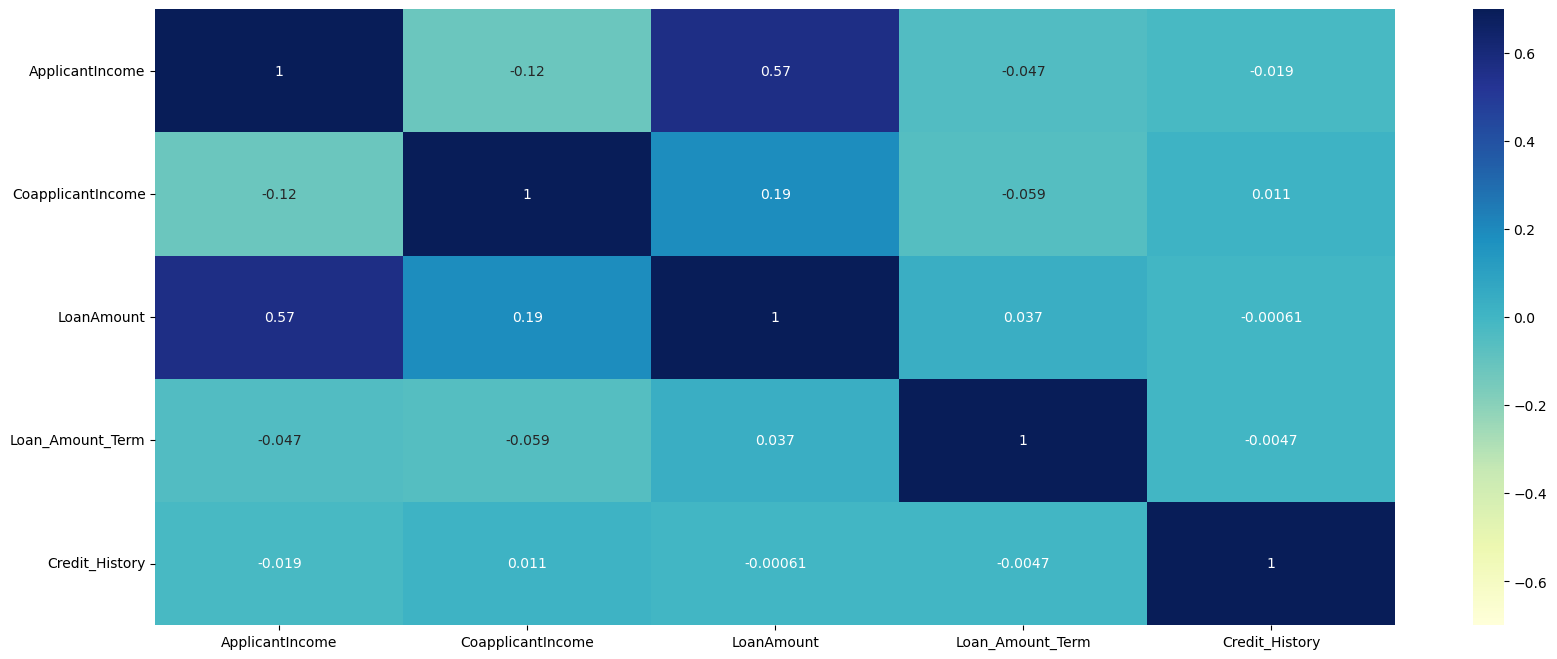

In [15]:
corrmatrix= df.corr()
plt.subplots(figsize= (20,8))
sns.heatmap(corrmatrix, annot= True, vmax=0.7, vmin=-0.7, cmap='YlGnBu')

In [16]:
#label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [18]:
for num in ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']:
    df[num]= le.fit_transform(df[num])

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [20]:
#scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler(feature_range=(0,1))
df1= minmax.fit_transform(df)

In [22]:
type(df1)

numpy.ndarray

In [23]:
df1

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.        ]])

In [24]:
df1= pd.DataFrame(df1, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

In [25]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


In [26]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.064978,0.038910,0.197905,0.706005,0.855049,0.518730,0.687296
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.075560,0.070229,0.121718,0.137668,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df1.index=df.index

In [28]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0
LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
LP002979,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
LP002983,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0


# Linear Regression

In [29]:
y= df1['Loan_Status']
x= df1.drop('Loan_Status', axis= 1)

In [30]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
LP001003,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
LP001005,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
LP001006,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
LP001008,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [31]:
y.head()

Loan_ID
LP001002    1.0
LP001003    0.0
LP001005    1.0
LP001006    1.0
LP001008    1.0
Name: Loan_Status, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
model= lr.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [34]:
y_pred

array([ 0.81846136,  0.85382733,  0.84911896,  0.78159425,  0.76838429,
        0.84404507,  0.88943489,  0.9142389 ,  0.80031008,  0.8887877 ,
        0.1937573 ,  0.81266298,  0.86190063,  0.79818728,  0.90559635,
        0.84446722,  0.78606721,  0.70443274,  0.85054622,  0.85151242,
        0.85932671,  0.8160931 ,  0.85812766,  0.84516261,  0.8276543 ,
        0.67672412,  0.77447264,  0.74938139,  0.77362392,  0.89652204,
        0.91332965,  0.85011093,  0.786691  ,  0.74299589,  0.71052185,
        0.04002703,  0.82991889,  0.91523957,  0.88658387,  0.89967449,
        0.75896897,  0.80227284,  0.86819387,  0.82840468,  0.76326277,
        0.82826127,  0.82887057,  0.14721443,  0.10730353,  0.07330806,
        0.69580384,  0.74382392,  0.08383391,  0.71371189,  0.82590711,
        0.81912416,  0.70213971,  0.87018906,  0.12336666,  0.8597543 ,
       -0.00840419,  0.83568863,  0.18517918,  0.82778419,  0.89282974,
        0.77957909,  0.79117293,  0.87812474,  0.9266014 ,  0.79

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE is: ',  mean_squared_error(y_test, y_pred))
print('R Squared Value is: ', r2_score(y_test, y_pred))

MSE is:  0.16611350587645718
R Squared Value is:  0.26943859581252305


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression()

In [37]:
model1= log_reg.fit(x_train, y_train)

In [38]:
y_pred= model1.predict(x_test)

In [39]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[18 25]
 [ 1 79]]


In [41]:
print(accuracy_score(y_test, y_pred))

0.7886178861788617


In [42]:
print(precision_score(y_test, y_pred, pos_label= 'positive', average= 'micro'))

0.7886178861788617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [43]:
print(recall_score(y_test, y_pred,pos_label= 'positive', average= 'micro'))

0.7886178861788617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# KNN model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    model2= knn.fit(x_train, y_train)
    y_pred_knn= model2.predict(x_test)
    acc= accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [45]:
metric_k

[0.7398373983739838,
 0.6829268292682927,
 0.7560975609756098,
 0.6991869918699187,
 0.7723577235772358,
 0.7398373983739838,
 0.7642276422764228,
 0.7642276422764228,
 0.7804878048780488,
 0.7804878048780488,
 0.7804878048780488,
 0.7804878048780488]

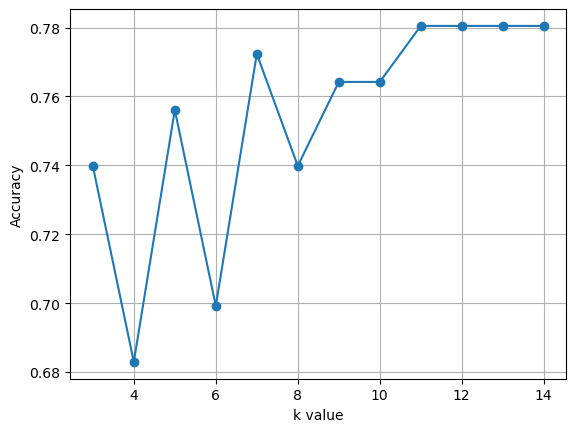

In [46]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [47]:
knn= KNeighborsClassifier(n_neighbors=4)
model2= knn.fit(x_train, y_train)
y_pred_knn= model2.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, pos_label= 'positive', average= 'micro'))
print(recall_score(y_test, y_pred_knn, pos_label= 'positive', average= 'micro'))

[[19 24]
 [15 65]]
0.6829268292682927
0.6829268292682927
0.6829268292682927


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM model

In [49]:
from sklearn.svm import SVC

svm_clf= SVC(kernel='rbf')
svm_model= svm_clf.fit(x_train, y_train)
y_pred= svm_clf.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.7886178861788617

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_clf= DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred= dt_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[23, 20],
       [18, 62]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.6910569105691057

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred= rf_clf.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 5, 75]], dtype=int64)

In [57]:
accuracy_score(y_test, y_pred)

0.7560975609756098

# Test data

In [58]:
data = pd.read_csv(r'C:\Users\HP\Downloads\test_lAUu6dG.csv',index_col='Loan_ID')

In [59]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban


In [60]:
data.shape

(367, 11)

In [61]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Preprocessing

In [62]:
data.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [64]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [65]:
for num in ['Gender','Self_Employed','Dependents']:
    data[num]= data[num].fillna(data[num].mode()[0])

In [66]:
for num in ['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    data[num]= data[num].fillna(data[num].median())

In [67]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
#checking correlation

<AxesSubplot:>

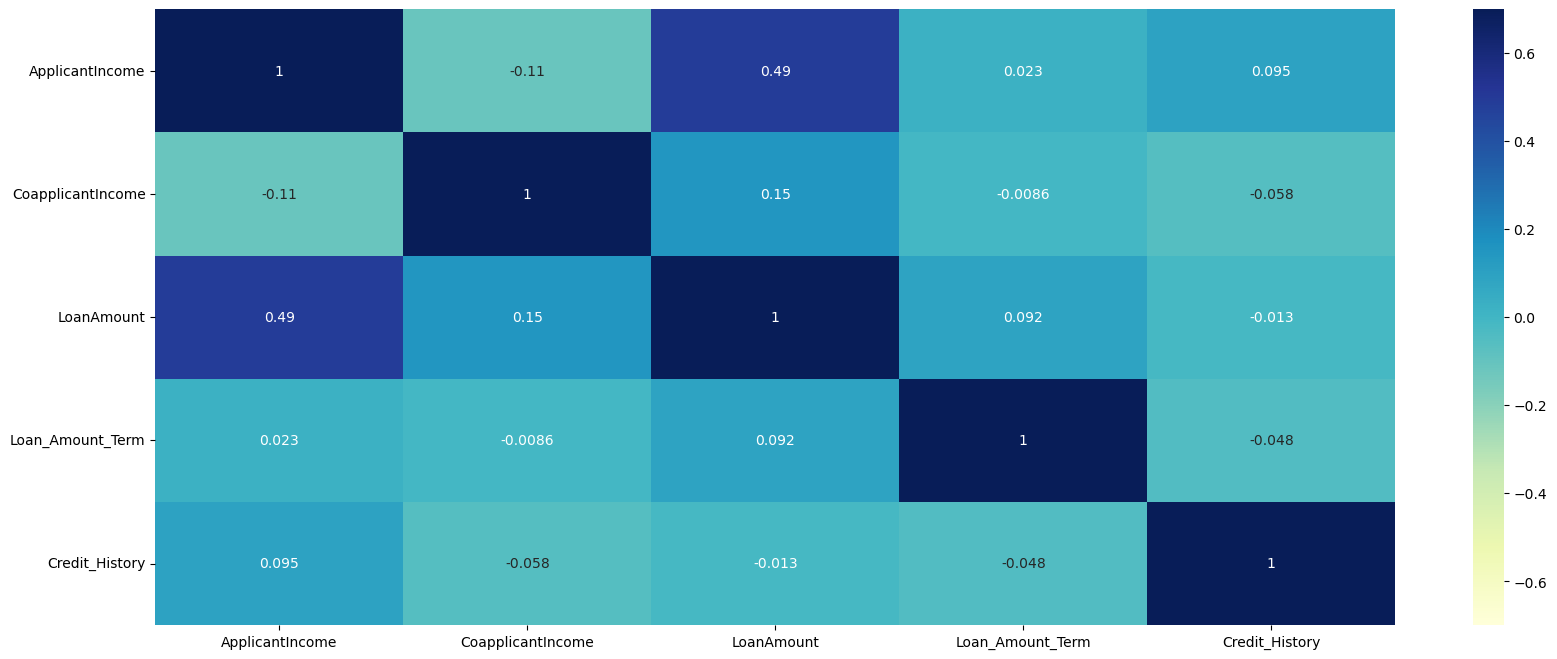

In [69]:
corrmatrix= data.corr()
plt.subplots(figsize= (20,8))
sns.heatmap(corrmatrix, annot= True, vmax=0.7, vmin=-0.7, cmap='YlGnBu')

In [70]:
#label encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()



In [73]:
for num in ['Gender', 'Married', 'Education','Dependents','Self_Employed','Property_Area']:
    data[num]= le.fit_transform(data[num])

In [74]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1


In [75]:
#scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler(feature_range=(0,1))
data1= minmax.fit_transform(data)

In [77]:
type(data1)

numpy.ndarray

In [78]:
data1

array([[1.        , 1.        , 0.        , ..., 0.74683544, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74683544, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74683544, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.74683544, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74683544, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.36708861, 1.        ,
        0.        ]])

In [80]:
data1= pd.DataFrame(data1, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [81]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,1.000000,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.0,1.0
363,1.0,1.0,0.000000,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.0,1.0
364,1.0,0.0,0.000000,0.0,0.0,0.044810,0.083042,0.187739,0.746835,1.0,0.5
365,1.0,1.0,0.000000,0.0,0.0,0.068938,0.099708,0.249042,0.746835,1.0,0.0


In [82]:
data1.index=data.index

In [83]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
LP001022,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
LP001031,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
LP001035,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
LP001051,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1.0,1.0,1.000000,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.0,1.0
LP002975,1.0,1.0,0.000000,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.0,1.0
LP002980,1.0,0.0,0.000000,0.0,0.0,0.044810,0.083042,0.187739,0.746835,1.0,0.5


In [85]:
data1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.268847,0.228883,0.100817,0.066258,0.065399,0.206860,0.710597,0.839237,0.539510
std,0.393417,0.482122,0.355059,0.420687,0.301498,0.067707,0.097260,0.116781,0.136410,0.367814,0.412168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.039488,0.000000,0.139847,0.746835,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.052200,0.042708,0.185824,0.746835,1.000000,0.500000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069765,0.101271,0.248084,0.746835,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
y_pred= rf_clf.predict(data1)

In [87]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [88]:
y_pred= pd.DataFrame(y_pred, columns=['Loan_Status'])

In [89]:
y_pred

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [90]:
y_pred['Loan_Status']= y_pred['Loan_Status'].replace([1.0],'Y')
y_pred['Loan_Status']= y_pred['Loan_Status'].replace([0.0],'N')

In [91]:
y_pred

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [92]:
y_pred.index= data.index

In [93]:
y_pred

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [94]:
y_pred.reset_index(inplace=True)

In [95]:
y_pred

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [97]:
y_pred.to_csv('Sample Submission.csv', index=False)